## Final Project Submission

Please fill out:
* Student name: Rwenji Murengaitta
* Student pace: part time
* Scheduled project review date/time: 2023-09-16
* Instructor name: Faith Rotich
* Blog post URL:


## OVERVIEW
![Alt text](download.jpeg)




In light of the surge in original film production by prominent corporations, Microsoft has sought our expertise in evaluating the prospects of the movie industry and offering guidance prior to any strategic determinations. Our assessment encompassed the utilization of return on investment as a key indicator for assessing the viability of distinct genres. Additionally, we conducted an in-depth examination of the leading studios in terms of box office success and scrutinized the most sought-after genres, as evidenced by substantial viewer ratings, in order to formulate our recommendations.

## Business Problem

Microsoft's primary concern revolves around ascertaining the viability of entering the film industry as a profitable business endeavor. Their pivotal tasks include pinpointing the specific genres of films to produce, formulating effective profit strategies, and establishing a distinctive presence that positions them as industry frontrunners.

## Objectives

1. To determine the genres of film that are popular among consumers.
2. To determine the impact of budget on profitability.
3. To offer recommendations on the same.

## 1. Importing Relevant Libraries
 First, we will import the necessary libraries. 

In [40]:
#Importing necessary libraries and packages
import pandas as pd
# setting pandas display to avoid scientific notation as we will be dealing with large figures 
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Data Exploration

In this project, we will be analyzing data from two movie websites: IMDB(Internet Movie Database) and BOM (Box Office Mojo).

### 2.1 IMDB Title Basics

In [41]:
movie_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movie_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


In [42]:
# More information on the dataset
movie_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB



The IMDB Title Basics dataset comprises 146,144 rows and encompasses 6 columns. Here's a breakdown of the column contents:

- tconst: This is an alphanumeric, unique identifier for each title. An object (possibly a string) and has 0 missing values.
- primary_title: It signifies the more popular title, often used by filmmakers in promotional materials upon release. String with 0 missing values.
- original_title: This column contains the original title in its original language. String with few missing values
- start_year (YYYY): This field denotes the release year of a title. For TV series, it corresponds to the year the series began. Integer with 0 missing values
- runtime_minutes: This column displays the primary duration of the title in minutes. Float with missing values
- genres: This column lists up to three genres associated with each title. String with missing values.

Note: The missing values will be dealt with on the next face of analysis after determining 

### 2.2 IMDB Title Ratings

In [43]:
movie_Trating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movie_Trating

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [44]:
movie_Trating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The IMDB title ratings dataset contains 73856 rows and 3 columns. Below is a breakdown of what the columns contain:

- tconst - alphanumeric unique identifier of the title. String with no missing values
- averagerating – weighted average of all the individual user ratings. Float with no missing values
- numvotes - number of votes the title has received. Integer with no missing values

### 2.3 BOM Movie Gross

In [45]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


In [46]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The BOM Movie Gross dataframe contains 3387 rows and 5 columns:

- title: the title of the movie. String data with no missing values.
- studio: the studio that produced the movie. String with few missing values
- domestic_gross : the domestic gross revenue of the movie. Float with few missing values
- foreign_gross : the foreign gross revenue of the movie. Object, likely string, with significant missing values
- year: the year in which the movie was released. Integer no missing values


### 2.4  The Numbers Movie Budgets dataset

In [47]:
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [48]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## 3. Data Cleaning

### 3.1 Cleaning IMDB Title Basics

#### a. Dealing with missing values

In [49]:
# Total number of missing values in the dataframe's columns
movie_title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

i. In majority of the films, both the original_title and primary_title are the same. In dealing with the missing data in the original_title we will replace with values in primary_title

In [50]:
# Replacing the 21 missing values in the original_title column with the corresponding values in the primary_title column
movie_title_basics['original_title'].fillna(movie_title_basics['primary_title'], inplace=True)
movie_title_basics.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

ii. For genres, we can't really predict the films genres or find suitable replacements, best would be to drop the 5408 rows with missing genre

In [51]:
# Dropping all the missing values in the genre column
movie_title_basics.dropna(subset=['genres'], inplace=True)
movie_title_basics.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

iii. Given the size of the data set, the average runtime of each film dictates the likelihood of a film with the same genre produced to be within the same range. We will replace missing runtime with the average in the genre category.

In [52]:
# Obtaining mean runtime for each genre
mean_runtimes = movie_title_basics.groupby('genres')['runtime_minutes'].mean()

# Replacing the NaN values with the mean runtime in the corresponding genre
movie_title_basics['runtime_minutes'] = movie_title_basics.apply(lambda row: mean_runtimes[row['genres']] if pd.isna(row['runtime_minutes']) else row['runtime_minutes'], axis=1)
movie_title_basics.dropna(subset=['runtime_minutes'], inplace=True)
movie_title_basics.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

#### b. Dealing with duplicates

In [53]:
movie_title_basics.drop_duplicates(subset='primary_title', keep='first', inplace= True)
movie_title_basics 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,97.00,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,74.66,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,93.28,Comedy


### 3.2 Cleaning BOM Movie Gross

a. Foreign gross is checking as an object and should be converted to a float

In [54]:
# Using the pandas fn pandas.to_numeric to convert from object/string to float and replacing that which don't with NaN
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


b. Dealing with missing data

In [55]:
# Total missing values in the BOM movie gross dataframe
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [56]:
# Since studio is a string given that we can't assume any values replaced missing values in the "studio" column with the string "None"
bom_movie_gross["studio"].fillna("None", inplace = True) 
bom_movie_gross.isna().sum()

title                0
studio               0
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [57]:
# replaced missing values in the "domestic_gross" and "foreign_gross" columns with 0, 
bom_movie_gross["domestic_gross"].fillna(0, inplace = True)
bom_movie_gross["foreign_gross"].fillna(0, inplace = True)
bom_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

c. Dealing with duplicates

### 3.3 Cleaning The Numbers Movie Budgets dataset

a. Converting strings to float
The dataset has no missing values but figures in the 3 columns; domestic_gross, production_budget and worldwide_gross are stored as strings and have comas. Cleaning here involves removing the comas and converting the strings to numbers for ease of arithmetic.

In [58]:
movie_budget['domestic_gross'] = pd.to_numeric(movie_budget['domestic_gross'].str[1:].str.replace(',', ''))
movie_budget['production_budget'] =pd.to_numeric(movie_budget['production_budget'].str[1:].str.replace(',', ''))
movie_budget['worldwide_gross'] = pd.to_numeric(movie_budget['worldwide_gross'].str[1:].str.replace(',', ''))
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


b. Dropping duplicates

In [59]:
movie_budget.drop_duplicates(subset='movie', keep='first', inplace=True)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


## 4. Data Analysis and Visualization

### 4.1 Merging Dataframes for easy Analysis

### Merging the Basic Titles and Title Rating Dataframes

In [60]:
# Using .merge() method merged the two datasets
main_df = movie_title_basics.merge(movie_Trating, how='inner', on='tconst')
main_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,97.00,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...,...,...
68147,tt9910930,Jeg ser deg,Jeg ser deg,2019,75.00,"Crime,Documentary",6.10,7
68148,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.00,Drama,8.40,365
68149,tt9913056,Swarm Season,Swarm Season,2019,86.00,Documentary,6.20,5
68150,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,6.20,6


### Merging the BOM Movie Gross and The Numbers Movie Budget Dataframes

In [61]:
# Created Profit column on the worldwide market
movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']
# Created Return on Investement (ROI column)
movie_budget['ROI'] = ((movie_budget['worldwide_gross'] - movie_budget['production_budget'])/movie_budget['production_budget'])*100
# Change the name of the column movie to primary_title from the movie_budget dataset
movie_budget=movie_budget.rename(columns = {'movie':'title'})
balance_df = movie_budget.merge(bom_movie_gross, how='inner', on='title')
balance_df.sort_values(by='profit', ascending= False )

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,profit,ROI,studio,domestic_gross_y,foreign_gross,year
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.71,BV,678800000.00,0.00,2018
21,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666.91,Uni.,652300000.00,0.00,2015
39,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,699.33,Uni.,353000000.00,0.00,2015
24,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,574.13,BV,700100000.00,646900000.00,2018
64,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,668.10,Uni.,417700000.00,891800000.00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
263,47,"Jan 16, 2015",Blackhat,70000000,8005980,19665004,-50334996,-71.91,Uni.,8000000.00,11600000.00,2015
136,55,"Jul 19, 2013",R.I.P.D.,130000000,33618855,79076678,-50923322,-39.17,Uni.,33600000.00,44700000.00,2013
146,81,"Jan 13, 2017",Monster Trucks,125000000,33370166,61642798,-63357202,-50.69,Par.,33400000.00,31100000.00,2017
206,79,"Nov 24, 2010",The Nutcracker in 3D,90000000,195459,20466016,-69533984,-77.26,Free,195000.00,16000000.00,2010


#### Merging the two datasets to have one dataset with all the data

In [62]:
main_df = main_df.rename(columns={'primary_title':'title'})
df = balance_df.merge(main_df, how='inner', on='title')
df

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,profit,ROI,studio,domestic_gross_y,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.67,BV,241100000.00,804600000.00,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"Action,Adventure,Fantasy",6.60,447624
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.38,BV,459000000.00,946400000.00,2015,tt2395427,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,665594
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.71,BV,678800000.00,0.00,2018,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,118.65,WB,229000000.00,428900000.00,2017,tt0974015,Justice League,2017,120.00,"Action,Adventure,Fantasy",6.50,329135
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.21,Sony,200100000.00,680600000.00,2015,tt2379713,Spectre,2015,148.00,"Action,Adventure,Thriller",6.80,352504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,68,"Apr 27, 2012",Sound of My Voice,135000,408015,429448,294448,218.11,FoxS,408000.00,0.00,2012,tt1748207,Sound of My Voice,2011,85.00,"Drama,Mystery,Sci-Fi",6.60,19387
1136,73,"Jun 15, 2012",Your Sister's Sister,120000,1597486,3090593,2970593,2475.49,IFC,1600000.00,0.00,2012,tt1742336,Your Sister's Sister,2011,90.00,"Comedy,Drama",6.70,24780
1137,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,41556.47,WB (NL),22800000.00,20200000.00,2015,tt2309260,The Gallows,2015,81.00,"Horror,Mystery,Thriller",4.20,17763
1138,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,2669.78,A24,1600000.00,0.00,2017,tt6265828,A Ghost Story,2017,92.00,"Drama,Fantasy,Romance",6.80,46280


### 4.2 Relationship between worldwide gross, domestic gross and their relationship with production budget

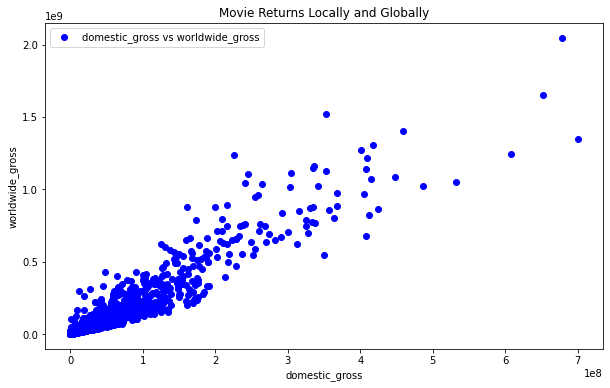

In [63]:
# Plot showing the corr between the domestic_gross and worldwide_gross
plt.figure(figsize=(10,6))
plt.scatter(data=balance_df, x='domestic_gross_x', y='worldwide_gross', color='blue')

plt.xlabel('domestic_gross')
plt.ylabel('worldwide_gross')
plt.title('Movie Returns Locally and Globally')
plt.legend(['domestic_gross vs worldwide_gross'])
plt.show();

The scatterplot presented above clearly indicates a robust and favorable connection between a movie's performance in the domestic and global box office. This suggests that when a film achieves success in the domestic market, it is likely to excel on a global scale as well. This underscores the significance of prioritizing the local market for the expansion and success of a movie studio.

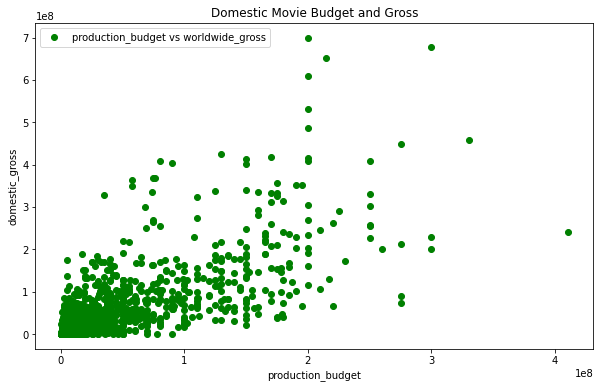

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(data=balance_df, x='production_budget', y='domestic_gross_x', color='green')

plt.xlabel('production_budget')
plt.ylabel('domestic_gross')
plt.title('Domestic Movie Budget and Gross')
plt.legend(['production_budget vs worldwide_gross'])
plt.show();

The general trend is that when films have a lower production budget they tend to fetch less domestically, still we see a few cases of huge budgets and little gross and low budget but subtantial gross domestically, this are just a few outliers

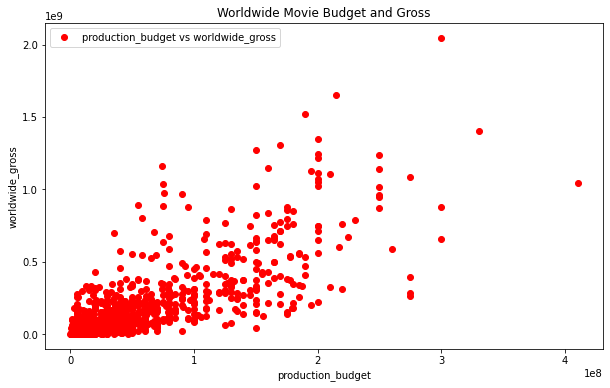

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(data=balance_df, x='production_budget', y='worldwide_gross', color='red')

plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')
plt.title('Worldwide Movie Budget and Gross')
plt.legend(['production_budget vs worldwide_gross'])
plt.show();

Same case as domestically, there is a positive relationship betweem budget and sale

#### Correlation between production_budget, domestic_gross, worldwide_gross and ROI

In [66]:
returns_corr =balance_df[['production_budget', 'domestic_gross_x', 'worldwide_gross', 'profit']].corr()
returns_corr

,production_budget,domestic_gross_x,worldwide_gross,profit
production_budget,1.00,0.70,0.78,0.66
domestic_gross_x,0.70,1.00,0.94,0.93
worldwide_gross,0.78,0.94,1.00,0.98
profit,0.66,0.93,0.98,1.00


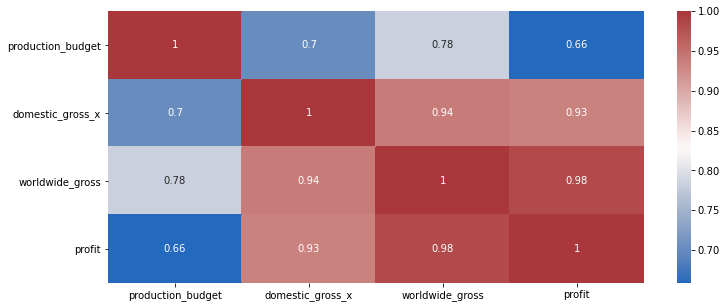

In [67]:
# Heatmap for production_budget, domestic_gross, worldwide_gross and profit
plt.figure(figsize = (12,5))
sns.heatmap(returns_corr, cmap ='vlag', annot =True);

From the correlation values we generally have a positive correclation between the variables. A noteworthy observation is that worldwide_gross and profit have a very strong positive relationship which typically means that films that do well internationally lead to more profits. It is also noteworthy that despite production_budget being positively linked to profits, it doesn't impact so significantly on profits and there are other parameters to consider.

### 4.3 How do genres influence popularity and profitablilty

a. Profitability

In [68]:
# Created a dataframe for the 12 most profitable films.
top_earners = df.sort_values(by='profit', ascending= False ).head(12)
top_earners

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,profit,ROI,studio,domestic_gross_y,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.71,BV,678800000.00,0.00,2018,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926
21,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666.91,Uni.,652300000.00,0.00,2015,tt0369610,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
39,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,699.33,Uni.,353000000.00,0.00,2015,tt2820852,Furious Seven,2015,137.00,"Action,Crime,Thriller",7.20,335074
24,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,574.13,BV,700100000.00,646900000.00,2018,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148
64,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,668.10,Uni.,417700000.00,891800000.00,2018,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125
89,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,748.31,BV,400700000.00,875700000.00,2013,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311
239,73,"Jul 10, 2015",Minions,74000000,336045770,1160336173,1086336173,1468.02,Uni.,336000000.00,823400000.00,2015,tt2293640,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,193917
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.38,BV,459000000.00,946400000.00,2015,tt2395427,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,665594
25,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1042520711,521.26,BV,608600000.00,634200000.00,2018,tt3606756,Incredibles 2,2018,118.00,"Action,Adventure,Animation",7.70,203510
29,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,1015392272,507.70,BV,409000000.00,805800000.00,2013,tt1300854,Iron Man Three,2013,130.00,"Action,Adventure,Sci-Fi",7.20,692794


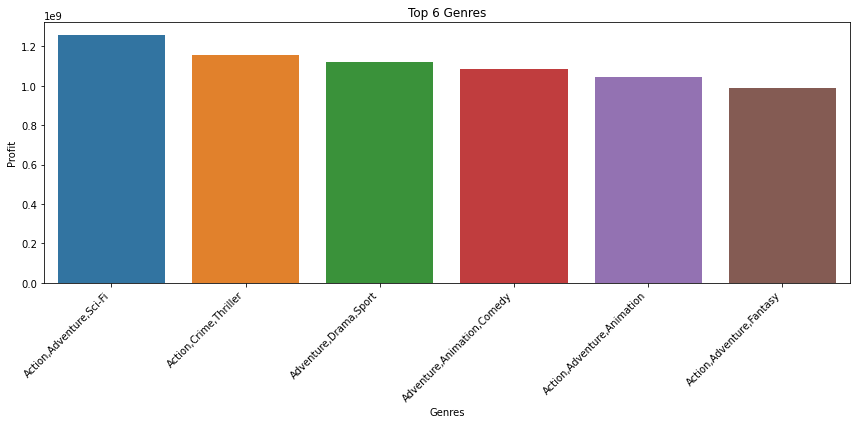

In [69]:
# Plot a barplot showing the top 6 genres making the most profits
plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'profit', data = top_earners, ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Top 6 Genres')
plt.tight_layout()
plt.show()

The popular genres that bring in big money seem to be mostly Action and Adventure films

b. Popularity

In [70]:
# Get the top 10 with the most value counts
unique_genres = main_df['genres'].value_counts().reset_index()
unique_genres.columns = ['genres', 'genres_count']
top_genres = unique_genres.head(8)
top_genres

,genres,genres_count
0,Drama,10529
1,Documentary,9875
2,Comedy,5378
3,Horror,2491
4,"Comedy,Drama",2446
5,Thriller,1371
6,"Drama,Romance",1368
7,"Comedy,Romance",1173


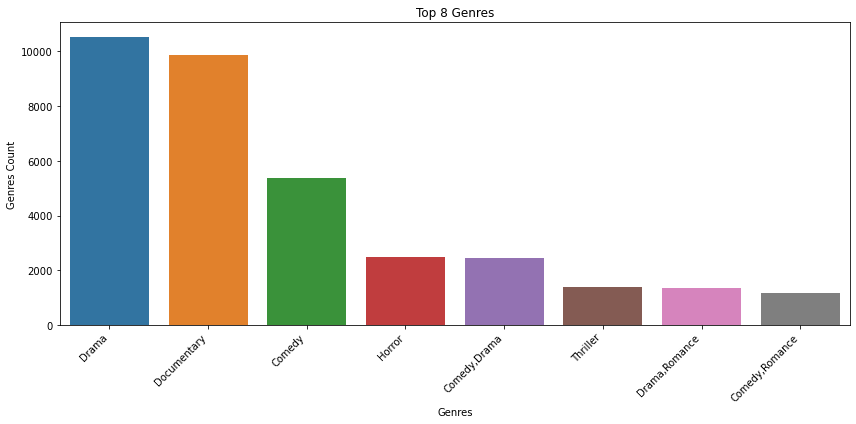

In [71]:
# Plot a bar showing the top 10 genres with the most value counts

plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'genres_count', data = top_genres, ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Genres Count')
plt.title('Top 8 Genres')
plt.tight_layout()
plt.show()

From the graph we can be able to deduce that the most popular genre created by other film makers is Drama.

### 4.4 How does runtime relate with profitability

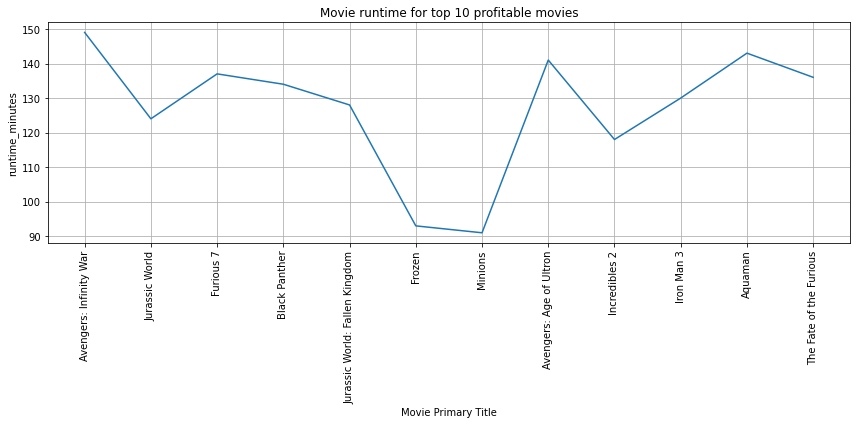

In [72]:
# Plot a lineplot showing Movie runtime for the top 10 profitable movies
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_earners, x="title", y= "runtime_minutes")
plt.xlabel("Movie Primary Title")
plt.ylabel("runtime_minutes")
plt.title("Movie runtime for top 10 profitable movies")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

On average, a movie should last between 90 to 150 minutes to be among the top eaners

### 4.5 Average rating, number of votes and production_budget

In [73]:
rating_corr =df[['averagerating', 'numvotes', 'production_budget']].corr()
rating_corr

,averagerating,numvotes,production_budget
averagerating,1.00,0.49,0.14
numvotes,0.49,1.00,0.52
production_budget,0.14,0.52,1.00


<AxesSubplot:>

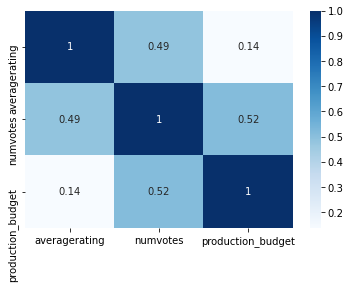

In [74]:
# create a heatmap to show the correlation of the average rating and the number of vote
sns.heatmap(rating_corr, cmap ='Blues', annot =True)

From the hitmap number of votes, average rating and production budget are positively correlated. However, production budget seems to have more effect on number of votes than on average rating. This means that the more the production costs even if the consumers don't really enjoy the film they still went and watched and voted. This means that production cost is essential in the profitability of the investement.

### 4.6 Return on Investement (ROI)

In [75]:
top_ROI = df.sort_values(by='ROI', ascending= False ).head(10)
top_ROI

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,profit,ROI,studio,domestic_gross_y,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1137,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,41556.47,WB (NL),22800000.00,20200000.00,2015,tt2309260,The Gallows,2015,81.00,"Horror,Mystery,Thriller",4.20,17763
1104,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,10075.95,Par.,53300000.00,48500000.00,2012,tt1560985,The Devil Inside,2012,83.00,Horror,4.20,33522
1100,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,6558.06,FD,54000000.00,43000000.00,2011,tt1591095,Insidious,2010,103.00,"Horror,Mystery,Thriller",6.90,254197
1105,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,6336.42,Uni.,32500000.00,31600000.00,2015,tt3713166,Unfriended,2014,83.00,"Horror,Mystery,Thriller",5.60,62043
1048,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,5817.07,Par.,84800000.00,92800000.00,2010,tt1536044,Paranormal Activity 2,2010,91.00,Horror,5.70,93122
979,50,"Jan 20, 2017",Split,5000000,138141585,278964806,273964806,5479.30,Uni.,138300000.00,140200000.00,2017,tt2660118,Split,2016,90.00,"Comedy,Romance,Sport",2.90,557
978,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,250367951,5007.36,Uni.,176000000.00,79400000.00,2017,tt5052448,Get Out,2017,104.00,"Horror,Mystery,Thriller",7.70,400474
1107,18,"May 25, 2012",Chernobyl Diaries,1000000,18119640,42411721,41411721,4141.17,WB,18100000.00,19000000.00,2012,tt1991245,Chernobyl Diaries,2012,86.00,"Horror,Mystery,Thriller",5.00,60304
980,51,"Oct 21, 2011",Paranormal Activity 3,5000000,104028807,207039844,202039844,4040.80,Par.,104000000.00,103000000.00,2011,tt1778304,Paranormal Activity 3,2011,83.00,"Horror,Mystery,Thriller",5.80,85689
960,84,"Oct 3, 2014",Annabelle,6500000,84273813,256862920,250362920,3851.74,WB (NL),84300000.00,172800000.00,2014,tt3322940,Annabelle,2014,99.00,"Horror,Mystery,Thriller",5.40,122039


a. ROI and runtime

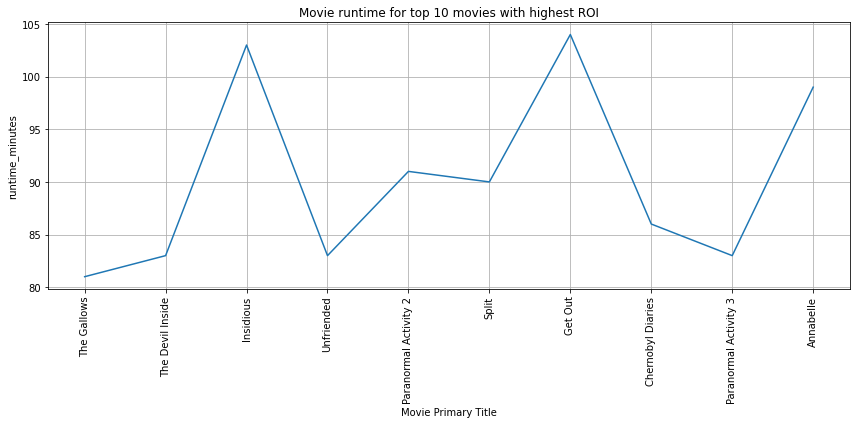

In [76]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_ROI, x="title", y= "runtime_minutes")
plt.xlabel("Movie Primary Title")
plt.ylabel("runtime_minutes")
plt.title("Movie runtime for top 10 movies with highest ROI")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

b. ROI and Production budget

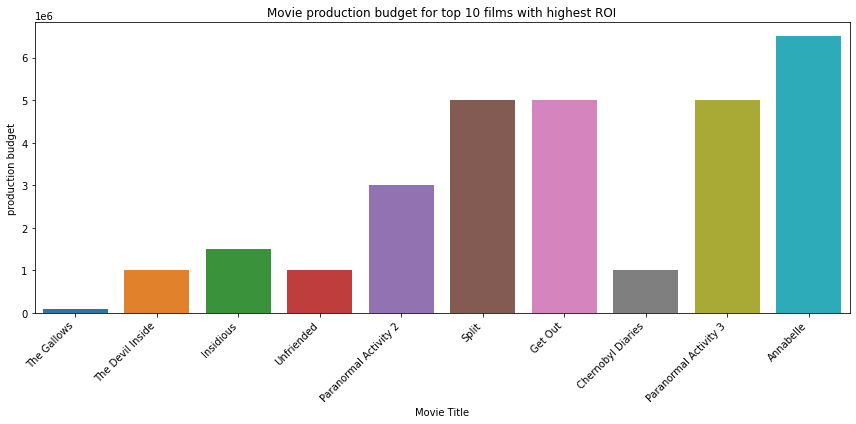

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_ROI, x="title", y= "production_budget", ci = None)
plt.xlabel("Movie Title")
plt.ylabel("production budget")
plt.title("Movie production budget for top 10 films with highest ROI")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

From a. and b. above it is important to note that high runtime (80-105) still defines films that have high ROI. ROI differs from profitability in that some budget films still make a lot of income and if the company seeks to make smaller inmvestements and get more returns this is what the would look at.

## 5. Conclusion and Recommendations

### 5.1 Conclusions 

1. The film's profitability will be significantly influenced by the budget earmarked for its production. It's important to keep in mind that allocating a budget does not guarantee the film's automatic success.
2. Genres that predominantly dominate the top earners are Action and Adventure. Films are not limited to these but having aspects of these genres in the films can boost profitabilty
3. Majority of the films that do well in the industry in terms of profitability or return on investement are long films with runtime betweem 80 minutes to 150 minutes
4. Popular genres among many of the filmmakers are drama and documentary. This may be due to individual market research and may be considered safe genres to make film in
5. The bigger the budget the more likely many people will watch and react to the film even if they don't like it.

### 5.2 Recommendations

1. __Comprehensive Budget Considerations__: When planning your film projects, it's crucial to take into account various elements that contribute to production quality and profitability. These encompass factors such as production quality, marketing strategies, the caliber of the cast, script quality, costume design, set design, and all other aspects related to budgeting. A thorough examination of these elements will help shape a more profitable film.

2. __Focus on Action and Adventure Genres__: It's advisable to give priority to producing more Action and Adventure films. These genres have consistently proven to be top earners within the industry. Audiences are drawn to thrilling, action-packed stories, making them a lucrative choice for filmmakers seeking profitability.

3. __Explore Drama and Documentary Productions__: In addition to Action and Adventure, consider exploring the production of drama and documentary films. These genres have a broad and enduring appeal within the industry and resonate well with both audiences and fellow filmmakers. Diversifying your portfolio with these genres can provide a stable and popular foundation.

4. __Embrace Longer Film Formats__: When deciding on film duration, it's worth noting that audiences generally prefer longer films over shorter ones. Longer films often allow for deeper storytelling, character development, and immersive experiences. While brevity has its merits, especially in certain genres like comedy, prioritizing longer films can enhance their perceived value and appeal to paying audiences.

5. __Market Research and Audience Preferences__: Alongside these recommendations, conduct thorough market research to understand current audience preferences and industry trends. Stay attuned to what viewers are seeking, as this can inform your decisions regarding genres, film length, and overall production strategies. Adapting to changing tastes is essential for sustained success in the film industry.
